# Basic Statistic

**Objective**

You’ve landed a great job with the Mallianzs insurance company as a data scientist. This insurance company wants to know its customer profile in a detailed way. Your team of engineers have to analyze the data that they have based on the predefined questions that your CEO gave.

## Question
### 1. Perform basic exploratory data analysis which should include the following and print out your insights at every step:
    a. The shape of the data
    b. The data type of each attribute
    c. Checking the presence of missing values
    d. 5 points summary of numerical attributes
    e. Distribution of 'bmi', 'age' and 'charges' columns
    f. The measure of skewness of 'bmi', 'age', and 'charges' columns
    g. Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

### 2. Answer the following questions with statistical evidence
    a. Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_desc = pd.read_excel('data_dict_insurance.xlsx')
df_desc

,Coloumn name,Definition
0,age,The age of the insurance account holder
1,sex,The gender of the insurance account holder
2,bmi,The Body Mass Index of the insurance account h...
3,children,The number of children of the insurance accoun...
4,smoker,The smoking status of the insurance account ho...
5,region,The region of the insurance account holder
6,charges,The charges/insurance fee paid by the insuran...


In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1 : (1A) The shape of the data

In [4]:
r = df.shape[0]
c = df.shape[1]
print('This table have {0} rows and {1} columns'.format(r,c))

This table have 1338 rows and 7 columns


## Q2 : (1B) The data type of each attribute

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This table have 2 data types of **float64**, 2 types of **int64**, and 3 types of **object.**

## Q3 : (1C) Checking the presence of missing values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This table has no missing value.

## Q4 : (1D) 5 points summary of numerical attributes

In [35]:
df['age'].describe()[1:6]

mean    39.207025
std     14.049960
min     18.000000
25%     27.000000
50%     39.000000
Name: age, dtype: float64

- Mean of Age : 39.207025
- Standard Deviation : 14.049960
- Minimum Value : 18
- Quartile 1 : 27
- Median : 39

## Q5 : (1E) Distribution of 'bmi', 'age' and 'charges' columns

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

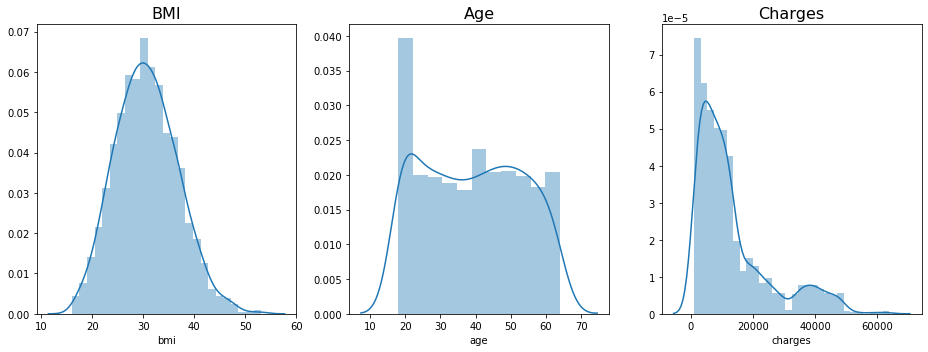

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(13,5))
sns.distplot(df['bmi'],ax=axes[0]).set_title('BMI', fontsize=16)
sns.distplot(df['age'],ax=axes[1]).set_title('Age', fontsize=16)
sns.distplot(df['charges'],ax=axes[2]).set_title('Charges', fontsize=16)
plt.tight_layout()
plt.show()

- Column 'bmi' have a normal distribution
- Column 'age' have bimodal distribution
- Column 'charges' have positive skewed

## Q6 : (1F) The measure of skewness of 'bmi', 'age', and 'charges' columns

In [11]:
x = df['bmi'].skew().round(5)
y = df['age'].skew().round(5)
z = df['charges'].skew().round(5)
print('Skewness of BMI are {0}, Age are {1}, Charges are {2}'.format(x,y,z))

Skewness of BMI are 0.28405, Age are 0.05567, Charges are 1.51588


## Q7 : (1G) Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

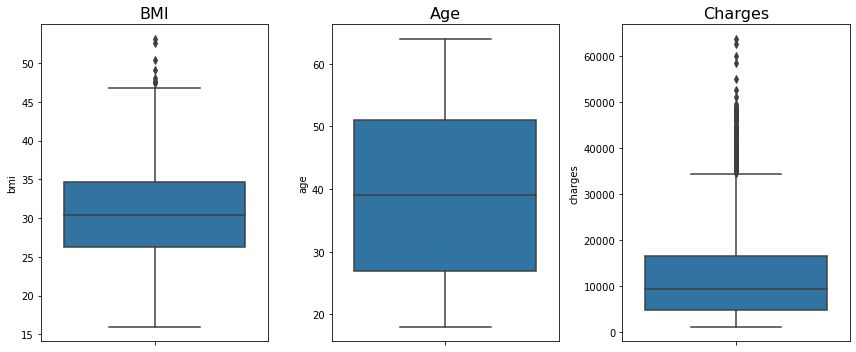

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(12,5))
sns.boxplot(y=df['bmi'],ax=axes[0]).set_title('BMI', fontsize=16)
sns.boxplot(y=df['age'],ax=axes[1]).set_title('Age', fontsize=16)
sns.boxplot(y=df['charges'],ax=axes[2]).set_title('Charges', fontsize=16)
plt.tight_layout()
plt.show()

Columns "BMI" and "Charges" have a several outliers according to the boxplot above.

## Q8 : (2A) Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

**Population** All people who smoke and not.

**Parameter** p1 - p2, where p1 = smoke and p2 = not smoke

**H0 :** Charges of people who smoke are same with not smoke. p1 - p2 = 0

**H1 :** Charges of people who smoke are different from not smoke. p1 - p2 ≠ 0

In [19]:
import statsmodels.api as sm
# t-test

smoke = df[df['smoker']=='yes']['charges']
not_smoke = df[df['smoker']=='no']['charges']
result = sm.stats.ttest_ind(smoke, not_smoke)
p = 0.05
if p > result[1]:
    print('''Test Statistic : {0}, p-value : {1}, Degrees of Freedom : {2} 

Accept Null Hypothesis'''.format(result[0],result[1],result[2]))

else:
    print('''Test Statistic : {0}, p-value : {1}, Degrees of Freedom : {2}

Reject Null Hypothesis'''.format(result[0],result[1],result[2]))

Test Statistic : 46.66492117272371, p-value : 8.271435842179102e-283, Degrees of Freedom : 1336.0 

Accept Null Hypothesis


Because the p-value is high (~3.12506) we **cannot reject** the Null Hypothesis that the difference between people who smoke is not significance.